In [16]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

def plot_histogram(file_s, file_b, label_s, label_b):
    s = h5py.File(file_b, "r")
    b = h5py.File(file_b, "r")

    smavg = np.array(s["pred_ptetaphim_max"][:,:,-1].mean(-1))
    bmavg = np.array(b["pred_ptetaphim_max"][:,:,-1].mean(-1))

    bins = np.linspace(0, 3500, 36)
    density = True

    plt.hist(bmavg, density=density, bins=bins, histtype="step", color="black", label=label_b)
    plt.hist(smavg, density=density, bins=bins, histtype="step", color="blue", label=label_s)

    mean_blue, sigma_blue = np.mean(smavg), np.std(smavg)
    mean_black, sigma_black = np.mean(bmavg), np.std(bmavg)
    
    s.close()
    b.close()

    return (mean_blue, sigma_blue), (mean_black, sigma_black)




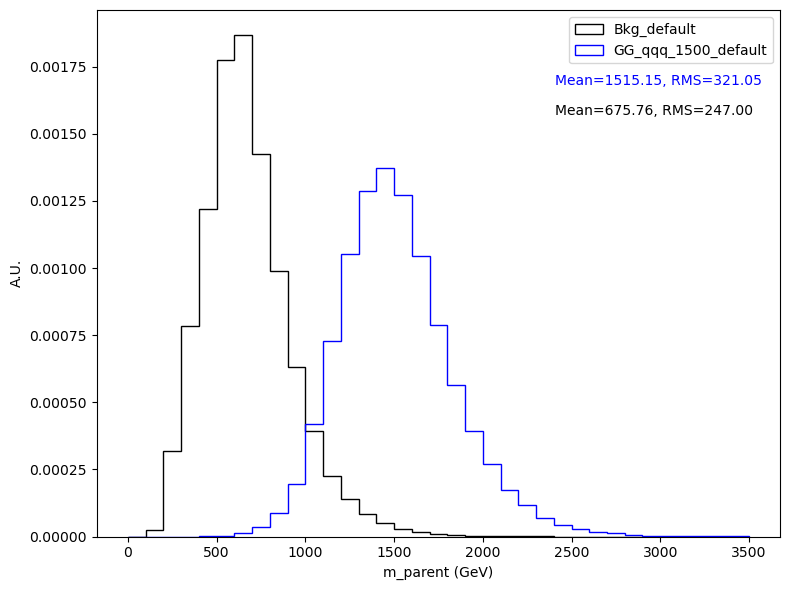

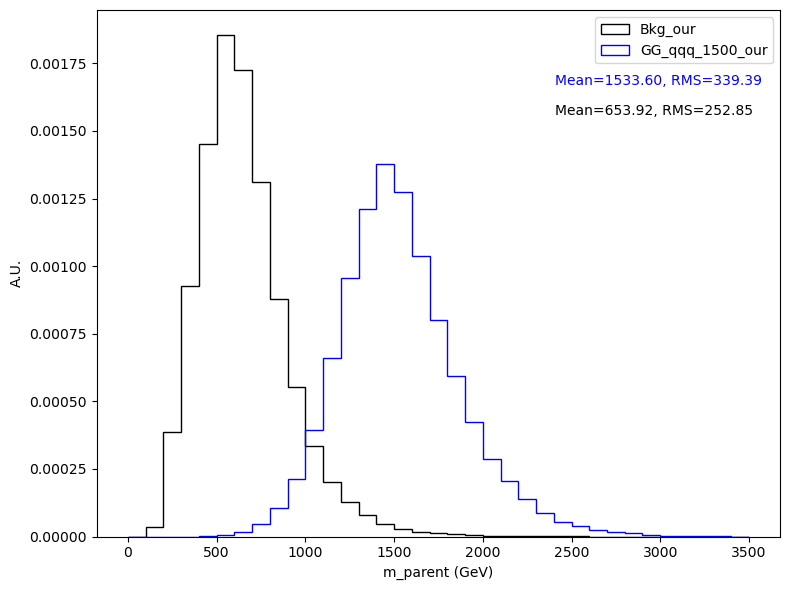

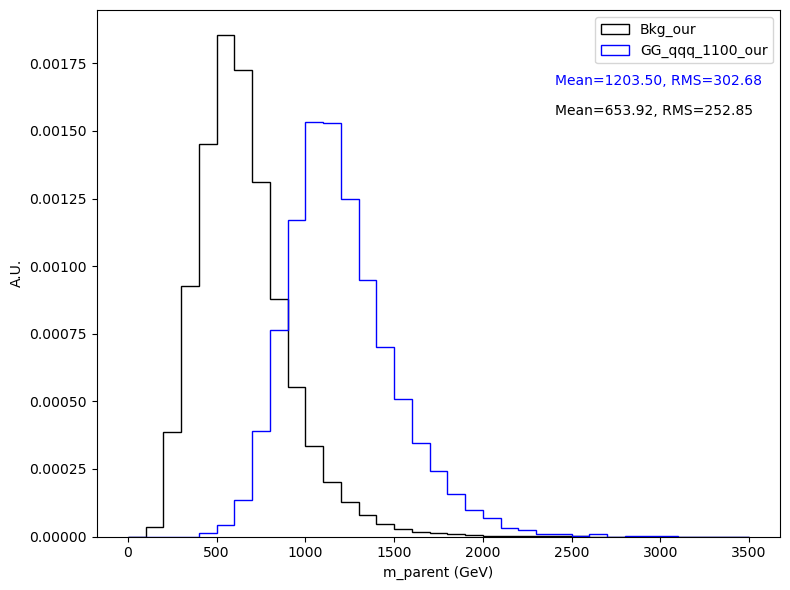

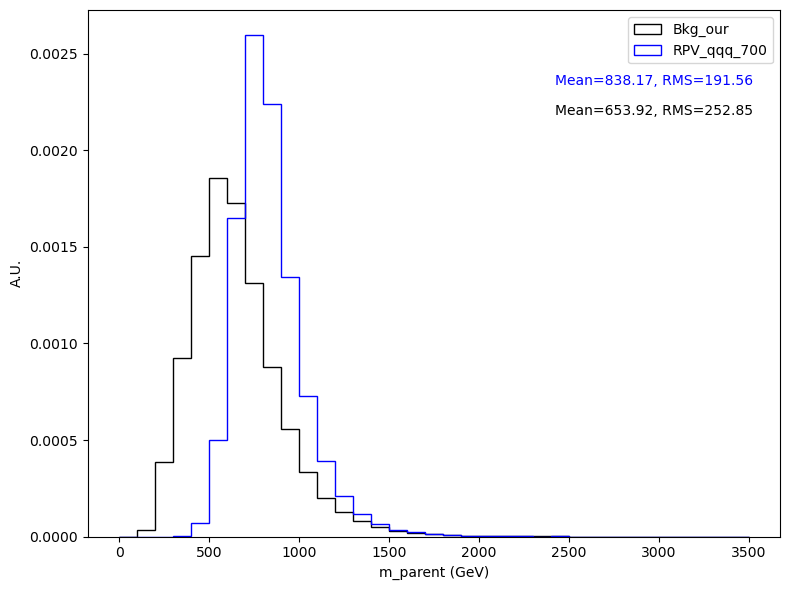

In [17]:
plots_info = [
    ("evaluate/GG_qqq_1500_transformer_classifier.h5", "evaluate/Bkg.sampled_200k_transformer_classifier.h5", "GG_qqq_1500_default", "Bkg_default"),
    ("evaluate/GG_qqq_1500_transformer_classifier_our.h5", "evaluate/Bkg.sampled_200k_transformer_classifier_our.h5", "GG_qqq_1500_our", "Bkg_our"),
    ("evaluate/GG_qqq_1100.sampled_10k_transformer_classifier_our.h5", "evaluate/Bkg.sampled_200k_transformer_classifier_our.h5", "GG_qqq_1100_our", "Bkg_our"),
    ("evaluate/signal700_transformer_classifier_our.h5", "evaluate/Bkg.sampled_200k_transformer_classifier_our.h5", "RPV_qqq_700", "Bkg_our")
]

for file_b, file_b, label_s, label_b in plots_info:
    plt.figure(figsize=(8, 6))  # Adjust figure size if necessary
    (mean_blue, sigma_blue), (mean_black, sigma_black) = plot_histogram(file_b, file_b, label_s, label_b)
    plt.legend()
    plt.xlabel('m_parent (GeV)')
    #plt.yscale('log')
    plt.ylabel('A.U.') 
    plt.figtext(0.7, 0.85, f'Mean={mean_blue:.2f}, RMS={sigma_blue:.2f}', color='blue')
    plt.figtext(0.7, 0.8, f'Mean={mean_black:.2f}, RMS={sigma_black:.2f}', color='black')
    plt.tight_layout()
    plt.savefig(f'{label_s}_{label_b}.png') 
    plt.show()


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

def plot_histograms(file_s_list, file_b, label_s_list, label_b):
    plt.figure(figsize=(8, 6))  # Adjust figure size if necessary
    density = True
    bins = np.linspace(0, 3500, 36)

    all_means_blue = []
    all_stds_blue = []
    all_means_black = []
    all_stds_black = []

    colors = plt.cm.get_cmap('tab10', len(file_s_list) + 1)

    for i, (file_s, label_s) in enumerate(zip(file_s_list, label_s_list)):
        s = h5py.File(file_s, "r")
        smavg = np.array(s["pred_ptetaphim_max"][:,:,-1].mean(-1))
        plt.hist(smavg, density=density, bins=bins, histtype="step", label=label_s, color=colors(i))
        s.close()
        mean_blue, std_blue = np.mean(smavg), np.std(smavg)
        all_means_blue.append(mean_blue)
        all_stds_blue.append(std_blue)

    b = h5py.File(file_b, "r")
    bmavg = np.array(b["pred_ptetaphim_max"][:,:,-1].mean(-1))
    plt.hist(bmavg, density=density, bins=bins, histtype="step", color="black", label=label_b)
    b.close()
    mean_black, std_black = np.mean(bmavg), np.std(bmavg)
    all_means_black.append(mean_black)
    all_stds_black.append(std_black)

    return (all_means_blue, all_stds_blue), (all_means_black, all_stds_black)



/tmp/ipykernel_12381/3518184944.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(file_s_list) + 1)


<Figure size 800x600 with 0 Axes>

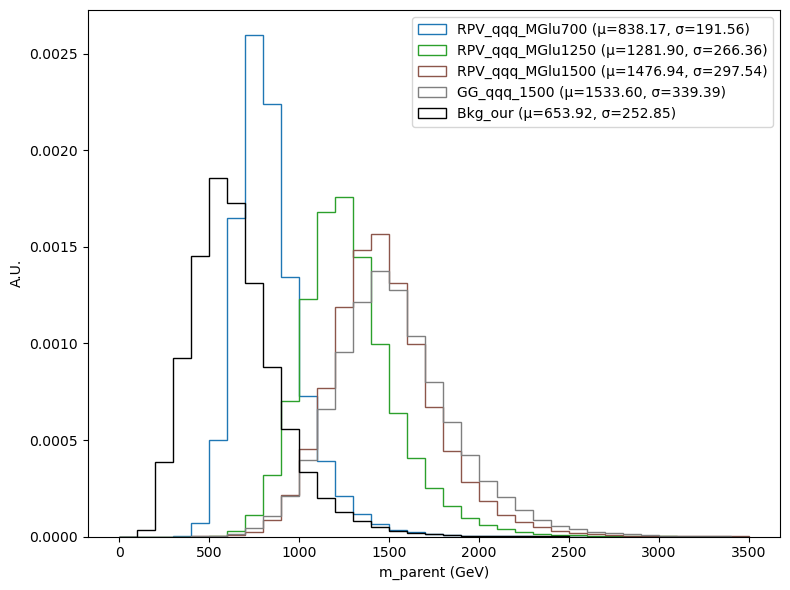

In [19]:
plots_info = [
    (["evaluate/signal700_transformer_classifier_our.h5","evaluate/signal1250_transformer_classifier_our.h5","evaluate/signal1500_transformer_classifier_our.h5","evaluate/GG_qqq_1500_transformer_classifier_our.h5"], "evaluate/Bkg.sampled_200k_transformer_classifier_our.h5", ["RPV_qqq_MGlu700","RPV_qqq_MGlu1250","RPV_qqq_MGlu1500","GG_qqq_1500"], "Bkg_our")
]

plt.figure(figsize=(8, 6)) 

for file_s_list, file_b, label_s_list, label_b in plots_info:
    (all_means_blue, all_stds_blue), (all_means_black, all_stds_black) = plot_histograms(file_s_list, file_b, label_s_list, label_b)
    plt.legend()
    plt.xlabel('m_parent (GeV)')
    plt.ylabel('A.U.') 

    legend_labels = label_s_list + [label_b]
    legend_labels = [f'{label} (μ={mean:.2f}, σ={std:.2f})' for label, mean, std in zip(legend_labels, all_means_blue + all_means_black, all_stds_blue + all_stds_black)]
    plt.legend(labels=legend_labels)

    plt.tight_layout()
    plt.savefig(f'{"_".join(label_s_list)}_{label_b}.png') 
    plt.show()


/tmp/ipykernel_12381/3518184944.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(file_s_list) + 1)


<Figure size 800x600 with 0 Axes>

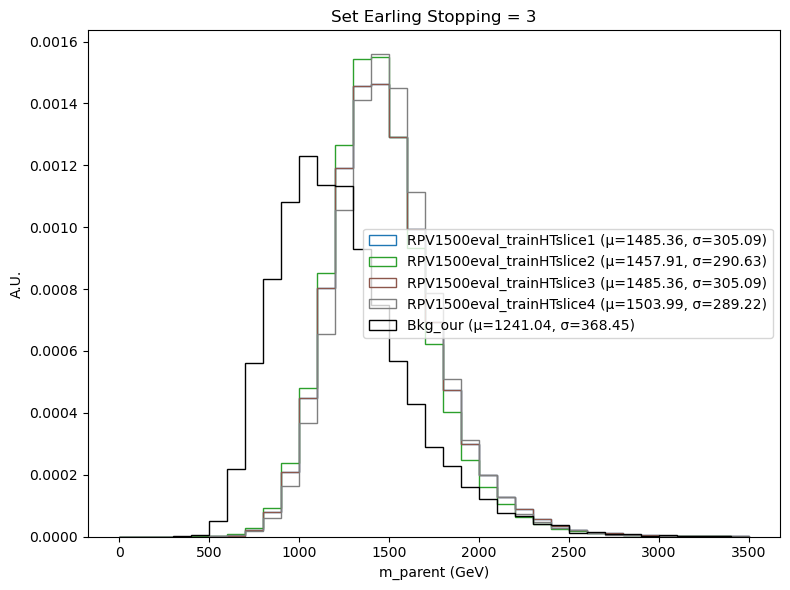

In [35]:
plots_info = [
    #(["evaluate/signal1500_training_2024.02.23.12.20.04_slice0.7to1k.h5","evaluate/signal1500_training_2024.02.23.12.29.42_slice1to1.5k.h5","evaluate/signal1500_training_2024.02.23.12.43.32_slice1.5kto2k.h5","evaluate/signal1500_training_2024.02.23.12.55.30_slice2kplus.h5"], "evaluate/Bkg.sampled_200k_transformer_classifier_our.h5", ['sig1500_trainedOnHT700to1k','sig1500_trainedOnHT1to1.5k','sig1500_trainedOnHT1.5to2k','sig1500_trainedOnHT2k+'], "Bkg_our")    
    (["evaluate/signal1500_training_2024.03.21.16.23.10_slice0.7to1k_ES3.h5","evaluate/signal1500_training_2024.03.21.16.01.53_slice1kto1.5k_ES3.h5","evaluate/signal1500_training_2024.03.21.16.23.10_slice1.5kto2k_ES3.h5","evaluate/signal1500_training_2024.03.21.15.18.07_slice2kplusES3.h5"], "evaluate/QCD_new_HT2000toInf_10files_training_2024.03.21.16.23.10.h5", ['sig1500_trainedOnHT700to1k','sig1500_trainedOnHT1to1.5k','sig1500_trainedOnHT1.5to2k','sig1500_trainedOnHT2k+'], "Bkg_our")
]

plt.figure(figsize=(8, 6))  # Adjust figure size if necessary

for file_s_list, file_b, label_s_list, label_b in plots_info:
    (all_means_blue, all_stds_blue), (all_means_black, all_stds_black) = plot_histograms(file_s_list, file_b, label_s_list, label_b)
    plt.legend()s
    plt.xlabel('m_parent (GeV)')
    plt.ylabel('A.U.') 
    plt.title('Set Earling Stopping = 3')

    # Adding mean and std to the legend with the same color as the histogram
    #legend_labels = label_s_list + [label_b]
    legend_labels = ['RPV1500eval_trainHTslice1','RPV1500eval_trainHTslice2','RPV1500eval_trainHTslice3','RPV1500eval_trainHTslice4'] + [label_b]
    legend_labels = [f'{label} (μ={mean:.2f}, σ={std:.2f})' for label, mean, std in zip(legend_labels, all_means_blue + all_means_black, all_stds_blue + all_stds_black)]
    plt.legend(labels=legend_labels)

    plt.tight_layout()
    plt.savefig(f'{"_".join(label_s_list)}_{label_b}.png') 
    plt.show()

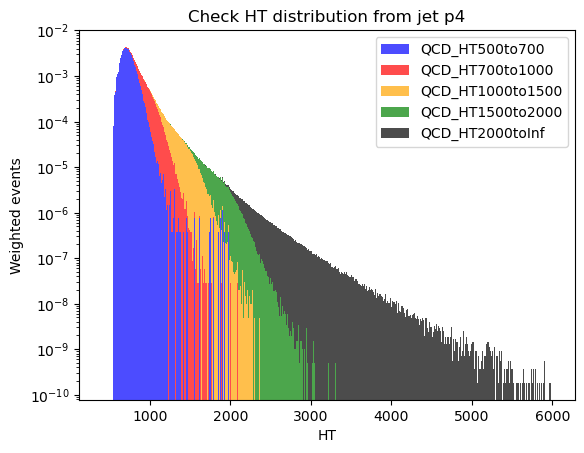

(379489,) (1114764,) (1047875,) (1186122,) (675778,)


NameError: name 'weights' is not defined

In [13]:
# Check xsec weights by plotting HT 
import h5py, numpy as np
import matplotlib.pyplot as plt

# Open the h5 files
#with h5py.File('QCD_HT_h5s/combined_out_QCD_HT700to1000.h5', 'r') as file1, h5py.File('QCD_HT_h5s/combined_out_QCD_HT1000to1500.h5', 'r') as file2, h5py.File('QCD_HT_h5s/combined_out_QCD_HT1500to2000.h5', 'r') as file3, h5py.File('QCD_HT_h5s/combined_out_QCD_HT2000toInf.h5', 'r') as file4:
with h5py.File('../slimmed_ntuples/combined_QCD_new_HT500to700_100k.h5', 'r') as file0, \
    h5py.File('../slimmed_ntuples/combined_QCD_new_HT700to1000_100k.h5', 'r') as file1, \
    h5py.File('../slimmed_ntuples/combined_QCD_new_HT1000to1500_100k.h5', 'r') as file2, \
    h5py.File('../slimmed_ntuples/combined_QCD_new_HT1500to2000_100k.h5', 'r') as file3, \
    h5py.File('../slimmed_ntuples/combined_QCD_new_HT2000toInf_100k.h5', 'r') as file4:

    # Access the dataset from each file
    data0 = file0['source']['pt']  
    data1 = file1['source']['pt']  
    data2 = file2['source']['pt'] 
    data3 = file3['source']['pt'] 
    data4 = file4['source']['pt'] 

    data0_HT = np.sum(data0, axis=1)
    data1_HT = np.sum(data1, axis=1)
    data2_HT = np.sum(data2, axis=1)
    data3_HT = np.sum(data3, axis=1)
    data4_HT = np.sum(data4, axis=1)

    x_sections = {'QCD_HT300to500': 0,
            'QCD_HT500to700': 29370,
            'QCD_HT700to1000': 6524,
            'QCD_HT1000to1500': 1064,
            'QCD_HT1500to2000': 121.5,
            'QCD_HT2000toInf': 25.42
            }
    
    weights0 = np.full_like(data0_HT, x_sections['QCD_HT500to700'] / len(data0_HT))
    weights1 = np.full_like(data1_HT, x_sections['QCD_HT700to1000'] / len(data1_HT))
    weights2 = np.full_like(data2_HT, x_sections['QCD_HT1000to1500'] / len(data2_HT))
    weights3 = np.full_like(data3_HT, x_sections['QCD_HT1500to2000'] / len(data3_HT))
    weights4 = np.full_like(data4_HT, x_sections['QCD_HT2000toInf'] / len(data4_HT))


    plt.hist([data0_HT, data1_HT, data2_HT, data3_HT, data4_HT], bins=1000, range=(400, 6000), 
        color=['blue','red', 'orange', 'green', 'black'], alpha=0.7, 
        label=['QCD_HT500to700', 'QCD_HT700to1000', 'QCD_HT1000to1500', 'QCD_HT1500to2000', 'QCD_HT2000toInf'], 
        #weights=[np.full_like(data0_HT, 0.013139), np.full_like(data1_HT, 0.00466), np.full_like(data2_HT, 0.00269), np.full_like(data3_HT, 0.00040), np.full_like(data4_HT, 0.00017)], 
        weights=[weights0, weights1, weights2, weights3, weights4],
        density=True, stacked=True)

    # Add labels, title, and legend
    plt.xlabel('HT')
    plt.ylabel('Weighted events')
    plt.yscale('log')
    plt.title('Check HT distribution from jet p4')
    plt.legend()

    #Display the plot
    plt.show()

print(data0_HT.shape, data1_HT.shape, data2_HT.shape, data3_HT.shape, data4_HT.shape)

In [5]:
def plot_b_histograms(file_b_list, label_b_list):
    plt.figure(figsize=(8, 6))  # Adjust figure size if necessary
    density = True
    bins = np.linspace(0, 3500, 36)

    all_means_blue = []
    all_stds_blue = []
    colors = plt.cm.get_cmap('tab10', len(file_b_list) + 1)

    for i, (file_b, label_b) in enumerate(zip(file_b_list, label_b_list)):
        s = h5py.File(file_b, "r")
        smavg = np.array(s["pred_ptetaphim_max"][:,:,-1].mean(-1))
        print(len(smavg))
        plt.hist(smavg, density=density, bins=bins, histtype="step", label=label_b, color=colors(i))
        s.close()
        mean_blue, std_blue = np.mean(smavg), np.std(smavg)
        all_means_blue.append(mean_blue)
        all_stds_blue.append(std_blue)

    return (all_means_blue, all_stds_blue)

/tmp/ipykernel_13235/1336522624.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(file_b_list) + 1)


675778
675778
675778
675778
675778
5


<Figure size 800x600 with 0 Axes>

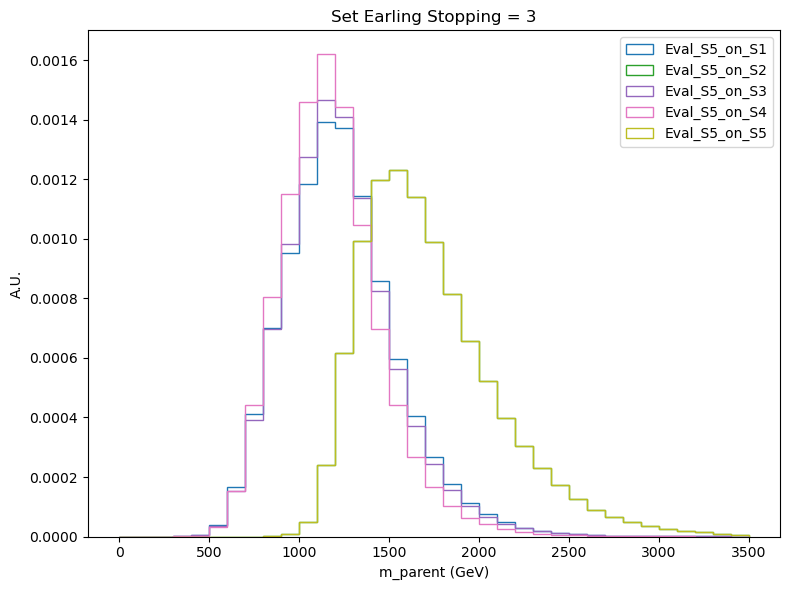

In [6]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# plots_info = [
#     #(["evaluate/signal1500_training_2024.02.23.12.20.04_slice0.7to1k.h5","evaluate/signal1500_training_2024.02.23.12.29.42_slice1to1.5k.h5","evaluate/signal1500_training_2024.02.23.12.43.32_slice1.5kto2k.h5","evaluate/signal1500_training_2024.02.23.12.55.30_slice2kplus.h5"], "evaluate/Bkg.sampled_200k_transformer_classifier_our.h5", ['sig1500_trainedOnHT700to1k','sig1500_trainedOnHT1to1.5k','sig1500_trainedOnHT1.5to2k','sig1500_trainedOnHT2k+'], "Bkg_our")    
#     #(["evaluate/signal1500_training_2024.03.21.16.23.10_slice0.7to1k_ES3.h5","evaluate/signal1500_training_2024.03.21.16.01.53_slice1kto1.5k_ES3.h5","evaluate/signal1500_training_2024.03.21.16.23.10_slice1.5kto2k_ES3.h5","evaluate/signal1500_training_2024.03.21.15.18.07_slice2kplusES3.h5"], "evaluate/QCD_new_HT2000toInf_10files_training_2024.03.21.16.23.10.h5", ['sig1500_trainedOnHT700to1k','sig1500_trainedOnHT1to1.5k','sig1500_trainedOnHT1.5to2k','sig1500_trainedOnHT2k+'], "Bkg_our")
#     (
#       ["evaluate/combined_QCD_new_HT700to1000_100k_training_2024.03.21.16.23.10.h5",
#       "evaluate/combined_QCD_new_HT1000to1500_100k_training_2024.03.21.16.23.10.h5",
#       "evaluate/combined_QCD_new_HT1500to2000_100k_training_2024.03.21.16.23.10.h5",
#       "evaluate/combined_QCD_new_HT2000toInf_100k_training_2024.03.21.16.23.10.h5"], 
#       ['QCD_sl1_trainedOnSl1','QCD_sl2_trainedOnSl1','QCD_sl3_trainedOnSl1','QCD_sl4_trainedOnSl1']
#       )
# ]

plots_info = [
['evaluate/new_train/combined_QCD_new_HT2000toInf_100k_training_2024.04.19.12.51.52_combined_QCD_new_HT500to700_100k.h5',
'evaluate/new_train/combined_QCD_new_HT2000toInf_100k_training_2024.04.19.11.14.46_combined_QCD_new_HT700to1000_100k.h5',
'evaluate/new_train/combined_QCD_new_HT2000toInf_100k_training_2024.04.19.11.37.55_combined_QCD_new_HT1000to1500_100k.h5',
'evaluate/new_train/combined_QCD_new_HT2000toInf_100k_training_2024.04.19.11.50.17_combined_QCD_new_HT1500to2000_100k.h5',
'evaluate/new_train/combined_QCD_new_HT2000toInf_100k_training_2024.04.19.12.18.10_combined_QCD_new_HT2000toInf_100k.h5'],
['Eval_S5_on_S1','Eval_S5_on_S2','Eval_S5_on_S3','Eval_S5_on_S4','Eval_S5_on_S5']
]


plt.figure(figsize=(8, 6))  # Adjust figure size if necessary


# for b_file, label_b in plots_info:
(all_means_blue, all_stds_blue) = plot_b_histograms(plots_info[0], plots_info[1])
print(len(all_means_blue))
plt.legend()
plt.xlabel('m_parent (GeV)')
plt.ylabel('A.U.') 
plt.title('Set Earling Stopping = 3')
plt.tight_layout()
#plt.savefig(f'{"_".join(label_s_list)}_{label_b}.png') 
plt.show()



[(['evaluate/new_train/combined_QCD_new_HT500to700_100k_training_2024.04.19.12.51.52_combined_QCD_new_HT500to700_100k.h5', 'evaluate/new_train/combined_QCD_new_HT700to1000_100k_training_2024.04.19.12.51.52_combined_QCD_new_HT500to700_100k.h5', 'evaluate/new_train/combined_QCD_new_HT1000to1500_100k_training_2024.04.19.12.51.52_combined_QCD_new_HT500to700_100k.h5', 'evaluate/new_train/combined_QCD_new_HT1500to2000_100k_training_2024.04.19.12.51.52_combined_QCD_new_HT500to700_100k.h5', 'evaluate/new_train/combined_QCD_new_HT2000toInf_100k_training_2024.04.19.12.51.52_combined_QCD_new_HT500to700_100k.h5'], ['HT500to700', 'HT700to1000', 'HT1000to1500', 'HT1500to2000', 'HT2000toInf'])]
[(['evaluate/new_train/combined_QCD_new_HT1000to1500_100k_training_2024.04.26.12.44.52_combined_QCD_new_HT700to1000_100k.h5', 'evaluate/new_train/combined_QCD_new_HT1500to2000_100k_training_2024.04.26.12.44.52_combined_QCD_new_HT700to1000_100k.h5', 'evaluate/new_train/combined_QCD_new_HT2000toInf_100k_training

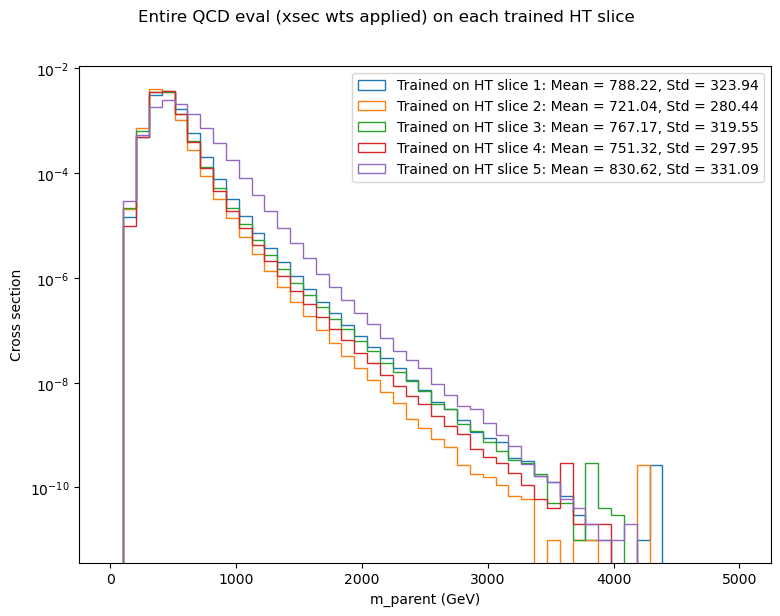

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

# get mass arr
def get_mass(inputFile):
    arr = inputFile
    s = h5py.File(inputFile, "r")
    smavg = np.array(s["pred_ptetaphim_max"][:,:,-1].mean(-1))
    s.close()
    return smavg

def plot_stacked_histogram(b_files, labels_b):
    plt.figure(figsize=(8, 6))
    bins = np.linspace(0, 5000, 50)

    all_masses = []
    all_weights = []
    all_labels = []
    for b_file, label_b in zip(b_files, labels_b):
        masses = get_mass(b_file)
        all_masses.extend(masses)
        weight = np.full_like(masses, x_sections[label_b] / len(masses))
        all_weights.extend(weight)
        all_labels.extend([label_b] * len(masses))

    plt.hist(all_masses, bins=bins, weights=all_weights, histtype='step', label=labels_b)

    combined_mean = np.mean(all_masses)
    combined_std = np.std(all_masses)
    plt.text(0.95, 0.9, f"Combined: Mean = {combined_mean:.2f}, Std = {combined_std:.2f}", transform=plt.gca().transAxes, ha='right', va='center')

    plt.legend()
    plt.xlabel('m_parent (GeV)')
    plt.ylabel('A.U.')
    plt.tight_layout()



# plots_info1 = [
#     (["evaluate/combined_QCD_new_HT700to1000_100k_training_2024.03.21.16.23.10.h5",
#       "evaluate/combined_QCD_new_HT1000to1500_100k_training_2024.03.21.16.23.10.h5",
#       "evaluate/combined_QCD_new_HT1500to2000_100k_training_2024.03.21.16.23.10.h5",
#       "evaluate/combined_QCD_new_HT2000toInf_100k_training_2024.03.21.16.23.10.h5"], 
#       ['QCD_HT700to1000','QCD_HT1000to1500','QCD_HT1500to2000','QCD_HT2000toInf']
#       )
# ]

# plots_info2 = [
#     (["evaluate/combined_QCD_new_HT700to1000_100k_training_2024.03.21.16.01.53.h5",
#       "evaluate/combined_QCD_new_HT1000to1500_100k_training_2024.03.21.16.01.53.h5",
#       "evaluate/combined_QCD_new_HT1500to2000_100k_training_2024.03.21.16.01.53.h5",
#       "evaluate/combined_QCD_new_HT2000toInf_100k_training_2024.03.21.16.01.53.h5"], 
#       ['QCD_HT700to1000','QCD_HT1000to1500','QCD_HT1500to2000','QCD_HT2000toInf']
#       )
# ]

# plots_info4 = [
#     (["evaluate/combined_QCD_new_HT700to1000_100k_training_2024.03.21.15.18.07.h5",
#       "evaluate/combined_QCD_new_HT1000to1500_100k_training_2024.03.21.15.18.07.h5",
#       "evaluate/combined_QCD_new_HT1500to2000_100k_training_2024.03.21.15.18.07.h5",
#       "evaluate/combined_QCD_new_HT2000toInf_100k_training_2024.03.21.15.18.07.h5"], 
#       ['QCD_HT700to1000','QCD_HT1000to1500','QCD_HT1500to2000','QCD_HT2000toInf']
#       )
# ]

import glob

directory = "evaluate/new_train/"
pattern1 = "training_2024.04.19.12.51.52"
pattern2 = "training_2024.04.26.12.44.52"
pattern3 = "training_2024.04.19.11.37.55"
pattern4 = "training_2024.04.19.11.50.17"
pattern5 = "training_2024.04.26.12.55.46"


files1 = glob.glob(directory + "*{}*.h5".format(pattern1))
files2 = glob.glob(directory + "*{}*.h5".format(pattern2))
files3 = glob.glob(directory + "*{}*.h5".format(pattern3))
files4 = glob.glob(directory + "*{}*.h5".format(pattern4))
files5 = glob.glob(directory + "*{}*.h5".format(pattern5))
plots_info1 = [(files1, [file.split('_')[4] for file in files1])]
plots_info2 = [(files2, [file.split('_')[4] for file in files2])]
plots_info3 = [(files3, [file.split('_')[4] for file in files3])]
plots_info4 = [(files4, [file.split('_')[4] for file in files4])]
plots_info5 = [(files5, [file.split('_')[4] for file in files5])]

print(plots_info1)
print(plots_info2)
print(plots_info3)


x_sections = {'HT500to700': 29370,
              'HT700to1000': 6524,
              'HT1000to1500': 1064,
              'HT1500to2000': 121.5,
              'HT2000toInf': 25.42
            }


plt.figure(figsize=(8, 6))


for plots_info, title in zip([plots_info1, plots_info2, plots_info3, plots_info4, plots_info5],
                             ['Trained on HT slice 1', 'Trained on HT slice 2', 'Trained on HT slice 3', 'Trained on HT slice 4', 'Trained on HT slice 5']):
    for b_files, labels_b in plots_info:
        all_masses = []
        all_weights = []
        all_labels = []
        for b_file, label_b in zip(b_files, labels_b):
            masses = get_mass(b_file)
            all_masses.extend(masses)
            weight = np.full_like(masses, x_sections[label_b] / len(masses))
            all_weights.extend(weight)
            all_labels.extend([label_b] * len(masses))

        mean = np.mean(all_masses)
        std = np.std(all_masses)
        plt.hist(all_masses, bins=np.linspace(0, 5000, 50), weights=all_weights, histtype='step', label=f"{title}: Mean = {mean:.2f}, Std = {std:.2f}", density=True)


plt.suptitle('Entire QCD eval (xsec wts applied) on each trained HT slice', y=1.02)
plt.legend()
plt.xlabel('m_parent (GeV)')
plt.ylabel('Cross section')
plt.tight_layout()
plt.yscale('log')
plt.show()

[['evaluate/new_train/combined_QCD_new_HT500to700_100k_training_2024.05.03.10.46.56_signal1250.h5', 'evaluate/new_train/combined_QCD_new_HT700to1000_100k_training_2024.05.03.10.46.56_signal1250.h5', 'evaluate/new_train/combined_QCD_new_HT1000to1500_100k_training_2024.05.03.10.46.56_signal1250.h5', 'evaluate/new_train/combined_QCD_new_HT1500to2000_100k_training_2024.05.03.10.46.56_signal1250.h5', 'evaluate/new_train/combined_QCD_new_HT2000toInf_100k_training_2024.05.03.10.46.56_signal1250.h5'], ['HT500to700', 'HT700to1000', 'HT1000to1500', 'HT1500to2000', 'HT2000toInf']]
379489
1114764


/tmp/ipykernel_8255/267465991.py:75: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(file_b_list) + 1)


1047875
1186122
675778
5


<Figure size 800x600 with 0 Axes>

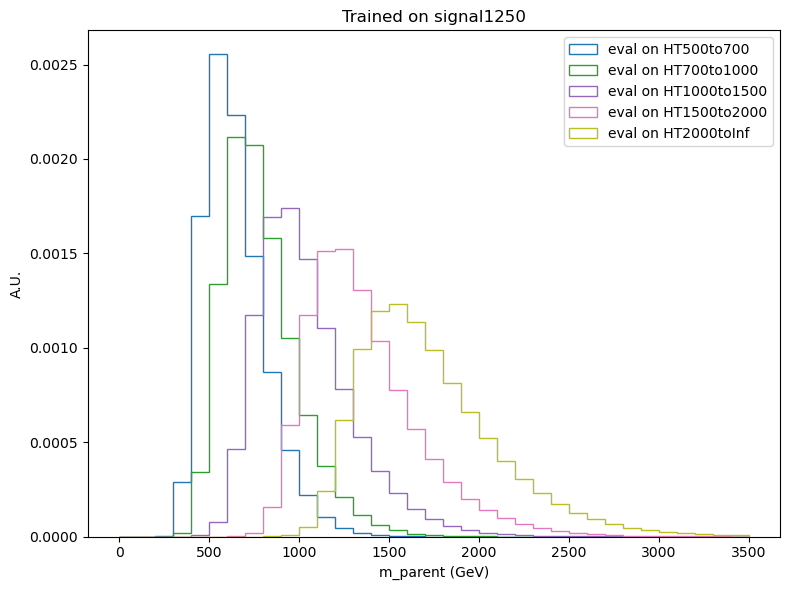

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

# get mass arr
def get_mass(inputFile):
    arr = inputFile
    s = h5py.File(inputFile, "r")
    smavg = np.array(s["pred_ptetaphim_max"][:,:,-1].mean(-1))
    s.close()
    return smavg


import glob

directory = "evaluate/new_train/"
pattern1 = "training_2024.04.19.12.51.52"
pattern2 = "training_2024.04.26.12.44.52"
pattern3 = "training_2024.04.19.11.37.55"
pattern4 = "training_2024.04.19.11.50.17"
pattern5 = "training_2024.04.26.12.55.46"
sigTrained = "training_2024.05.03.10.46.56_signal1250"


#pattern 2 and pattern 5 re-trained as the loss failed to converge
#Pattern = "combined_QCD_new_HT2000toInf_100k_training_"
files1 = glob.glob(directory + "*{}*.h5".format(sigTrained))
plots_info1 = [files1, [file.split('_')[4] for file in files1]]
print(plots_info1)

# plots_info1 = [
#     (["evaluate/combined_QCD_new_HT700to1000_100k_training_2024.03.21.16.23.10.h5",
#       "evaluate/combined_QCD_new_HT1000to1500_100k_training_2024.03.21.16.23.10.h5",
#       "evaluate/combined_QCD_new_HT1500to2000_100k_training_2024.03.21.16.23.10.h5",
#       "evaluate/combined_QCD_new_HT2000toInf_100k_training_2024.03.21.16.23.10.h5"], 
#       ['QCD_HT700to1000','QCD_HT1000to1500','QCD_HT1500to2000','QCD_HT2000toInf']
#       )
# ]

# plots_info2 = [
#     (["evaluate/combined_QCD_new_HT700to1000_100k_training_2024.03.21.16.01.53.h5",
#       "evaluate/combined_QCD_new_HT1000to1500_100k_training_2024.03.21.16.01.53.h5",
#       "evaluate/combined_QCD_new_HT1500to2000_100k_training_2024.03.21.16.01.53.h5",
#       "evaluate/combined_QCD_new_HT2000toInf_100k_training_2024.03.21.16.01.53.h5"], 
#       ['QCD_HT700to1000','QCD_HT1000to1500','QCD_HT1500to2000','QCD_HT2000toInf']
#       )
# ]

# plots_info4 = [
#     (["evaluate/combined_QCD_new_HT700to1000_100k_training_2024.03.21.15.18.07.h5",
#       "evaluate/combined_QCD_new_HT1000to1500_100k_training_2024.03.21.15.18.07.h5",
#       "evaluate/combined_QCD_new_HT1500to2000_100k_training_2024.03.21.15.18.07.h5",
#       "evaluate/combined_QCD_new_HT2000toInf_100k_training_2024.03.21.15.18.07.h5"], 
#       ['QCD_HT700to1000','QCD_HT1000to1500','QCD_HT1500to2000','QCD_HT2000toInf']
#       )
# ]

x_sections = {'QCD_HT500to700': 29370,
              'QCD_HT700to1000': 6524,
              'QCD_HT1000to1500': 1064,
              'QCD_HT1500to2000': 121.5,
              'QCD_HT2000toInf': 25.42
            }


plt.figure(figsize=(8, 6))

def plot_b_histograms(file_b_list, label_b_list):
    plt.figure(figsize=(8, 6))  # Adjust figure size if necessary
    density = True
    bins = np.linspace(0, 3500, 36)

    all_means_blue = []
    all_stds_blue = []
    colors = plt.cm.get_cmap('tab10', len(file_b_list) + 1)

    for i, (file_b, label_b) in enumerate(zip(file_b_list, label_b_list)):
        s = h5py.File(file_b, "r")
        smavg = np.array(s["pred_ptetaphim_max"][:,:,-1].mean(-1))
        print(len(smavg))
        label_b = 'eval on '+ str(label_b)
        plt.hist(smavg, density=density, bins=bins, histtype="step", label=label_b, color=colors(i))
        s.close()
        mean_blue, std_blue = np.mean(smavg), np.std(smavg)
        all_means_blue.append(mean_blue)
        all_stds_blue.append(std_blue)

    return (all_means_blue, all_stds_blue)

(all_means_blue, all_stds_blue) = plot_b_histograms(plots_info1[0], plots_info1[1])
print(len(all_means_blue))
plt.legend()
plt.xlabel('m_parent (GeV)')
plt.ylabel('A.U.') 
#plt.title('Eval of ' + '_'.join(sigTrained.split('_')[-1]))
plt.title('Trained on ' + sigTrained.split('_')[-1])
plt.tight_layout()
#plt.savefig(f'{"_".join(label_s_list)}_{label_b}.png') 

plt.show()


plots_info1: (['evaluate/new_train2/combined_QCD_new_HT500to700_100k_training_2024.06.03.14.14.04_combined_QCD_new_HT500to700_100k.h5', 'evaluate/new_train2/combined_QCD_new_HT700to1000_100k_training_2024.06.03.14.14.04_combined_QCD_new_HT500to700_100k.h5', 'evaluate/new_train2/combined_QCD_new_HT1000to1500_100k_training_2024.06.03.14.14.04_combined_QCD_new_HT500to700_100k.h5', 'evaluate/new_train2/combined_QCD_new_HT1500to2000_100k_training_2024.06.03.14.14.04_combined_QCD_new_HT500to700_100k.h5', 'evaluate/new_train2/combined_QCD_new_HT2000toInf_100k_training_2024.06.03.14.14.04_combined_QCD_new_HT500to700_100k.h5'], ['HT500to700', 'HT700to1000', 'HT1000to1500', 'HT1500to2000', 'HT2000toInf'])
plots_info2: (['evaluate/new_train2/combined_QCD_new_HT500to700_100k_training_2024.06.06.12.33.25_combined_QCD_new_HT500to700_100k.h5', 'evaluate/new_train2/combined_QCD_new_HT700to1000_100k_training_2024.06.06.12.33.25_combined_QCD_new_HT500to700_100k.h5', 'evaluate/new_train2/combined_QCD_new

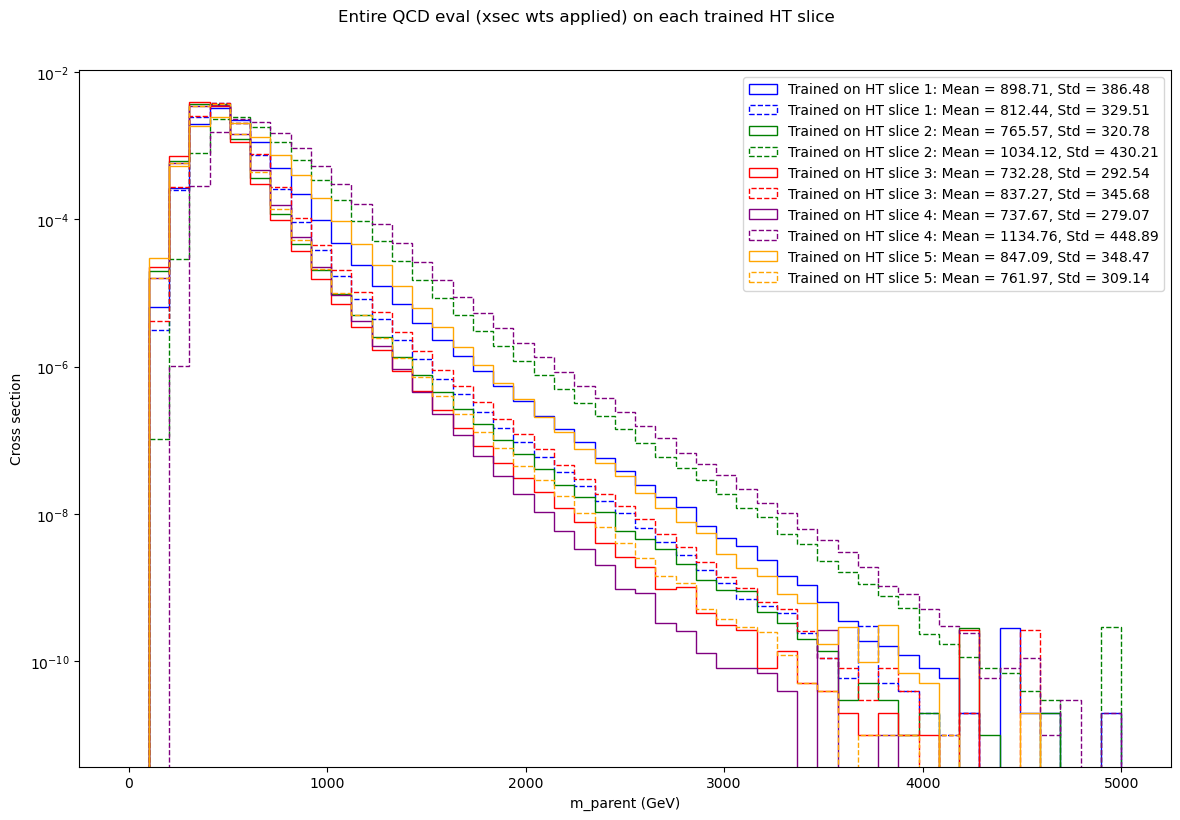

In [4]:
# Check the effect of multiple trainings
import matplotlib.pyplot as plt
import numpy as np
import h5py
import glob

# get mass arr
def get_mass(inputFile):
    arr = inputFile
    s = h5py.File(inputFile, "r")
    smavg = np.array(s["pred_ptetaphim_max"][:,:,-1].mean(-1))
    s.close()
    return smavg

directory = "evaluate/new_train2/"
patterns = [
    "training_2024.06.03.14.14.04",
    "training_2024.06.06.12.33.25",
    "training_2024.05.29.14.33.26",
    "training_2024.06.03.15.06.53",
    "training_2024.06.06.12.42.49",
    "training_2024.05.29.14.42.51",
    "training_2024.05.29.14.58.35",
    "training_2024.05.29.13.59.11",
    "training_2024.06.03.14.50.11",
    "training_2024.05.29.14.16.55"
]

plots_info = []

for pattern in patterns:
    files = glob.glob(f"{directory}*{pattern}*.h5")
    labels = [file.split('_')[4] for file in files]
    plots_info.append((files, labels))

for i, info in enumerate(plots_info, start=1):
    print(f"plots_info{i}: {info}")



x_sections = {'HT500to700': 29370,
              'HT700to1000': 6524,
              'HT1000to1500': 1064,
              'HT1500to2000': 121.5,
              'HT2000toInf': 25.42
            }

plt.figure(figsize=(12, 8))


titles = [
    'Trained on HT slice 1', 'Trained on HT slice 2', 'Trained on HT slice 3',
    'Trained on HT slice 4', 'Trained on HT slice 5'
]


line_styles = ['-', '--']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown'] 

for i in range(0, len(plots_info), 2):
    files1, labels1 = plots_info[i]
    files2, labels2 = plots_info[i + 1]
    
    all_masses1, all_weights1 = [], []
    all_masses2, all_weights2 = [], []

    for file, label in zip(files1, labels1):
        masses = get_mass(file)
        weight = np.full_like(masses, x_sections[label] / len(masses))
        all_masses1.extend(masses)
        all_weights1.extend(weight)

    for file, label in zip(files2, labels2):
        masses = get_mass(file)
        weight = np.full_like(masses, x_sections[label] / len(masses))
        all_masses2.extend(masses)
        all_weights2.extend(weight)

    mean1, std1 = np.mean(all_masses1), np.std(all_masses1)
    mean2, std2 = np.mean(all_masses2), np.std(all_masses2)

    color = colors[i // 2 % len(colors)]
    plt.hist(all_masses1, bins=np.linspace(0, 5000, 50), weights=all_weights1, histtype='step', linestyle=line_styles[0], color=color,
             label=f"{titles[i//2]}: Mean = {mean1:.2f}, Std = {std1:.2f}", density=True)
    plt.hist(all_masses2, bins=np.linspace(0, 5000, 50), weights=all_weights2, histtype='step', linestyle=line_styles[1], color=color,
             label=f"{titles[i//2]}: Mean = {mean2:.2f}, Std = {std2:.2f}", density=True)

plt.suptitle('Entire QCD eval (xsec wts applied) on each trained HT slice', y=1.02)
plt.legend()
plt.xlabel('m_parent (GeV)')
plt.ylabel('Cross section')
plt.tight_layout()
plt.yscale('log')
plt.show()